# credit card fraud detection

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "mlg-ulb/creditcardfraud",
  "creditcard.csv"
)

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [56]:
# extract features (everything except Class)
features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Time', 'Amount']
df_features = df[features]

# scale features
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df_features)
df_features_scaled = pd.DataFrame(scaled_array, columns=features, index=df.index)

# visualize
df_features_scaled.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Time,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,284807.000000,2.848070e+05,2.848070e+05,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,0.000000,-1.836189e-17,-5.109395e-17,1.277349e-17,-1.277349e-17,6.386744e-18,1.277349e-17,6.386744e-18,-6.386744e-18,4.790058e-18,...,3.193372e-18,0.000000,3.193372e-18,1.277349e-17,0.000000,9.580116e-18,3.592544e-18,-5.588401e-18,-5.109395e-17,-3.672378e-17
std,1.000002,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002,1.000002e+00,1.000002e+00,1.000002,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-28.798555,-4.403529e+01,-3.187173e+01,-4.013919e+00,-8.240810e+01,-1.963606e+01,-3.520940e+01,-6.130252e+01,-1.222802e+01,-2.258191e+01,...,-4.741907e+01,-15.065646,-7.175446e+01,-4.683638e+00,-19.750332,-5.401098e+00,-5.590660e+01,-4.674612e+01,-1.996583e+00,-3.532294e-01
25%,-0.469892,-3.624707e-01,-5.872142e-01,-5.993788e-01,-5.010686e-01,-5.766822e-01,-4.478860e-01,-1.746805e-01,-5.853631e-01,-4.917360e-01,...,-3.109433e-01,-0.747348,-2.591784e-01,-5.854676e-01,-0.608400,-6.780717e-01,-1.755053e-01,-1.604440e-01,-8.552120e-01,-3.308401e-01
50%,0.009245,3.965683e-02,1.186124e-01,-1.401724e-02,-3.936682e-02,-2.058046e-01,3.241723e-02,1.871982e-02,-4.681169e-02,-8.533551e-02,...,-4.009429e-02,0.009345,-1.792420e-02,6.765678e-02,0.031832,-1.081217e-01,3.325174e-03,3.406368e-02,-2.131453e-01,-2.652715e-01
75%,0.671694,4.867202e-01,6.774569e-01,5.250082e-01,4.433465e-01,2.991625e-01,4.611107e-01,2.740785e-01,5.435305e-01,4.168842e-01,...,2.537392e-01,0.728336,2.364319e-01,7.257153e-01,0.672801,4.996663e-01,2.255648e-01,2.371526e-01,9.372174e-01,-4.471707e-02
max,1.253351,1.335775e+01,6.187993e+00,1.191874e+01,2.521413e+01,5.502015e+01,9.747824e+01,1.675153e+01,1.419494e+01,2.180758e+01,...,3.703471e+01,14.473041,3.607668e+01,7.569684e+00,14.425318,7.293975e+00,7.831940e+01,1.025434e+02,1.642058e+00,1.023622e+02


# unsupervised

## k means clustering

In [57]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
k=2 # can change

In [58]:
kmeans = KMeans(n_clusters=k, random_state=14, n_init='auto') 
kmeans.fit(df_features_scaled)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,14
,copy_x,True
,algorithm,'lloyd'


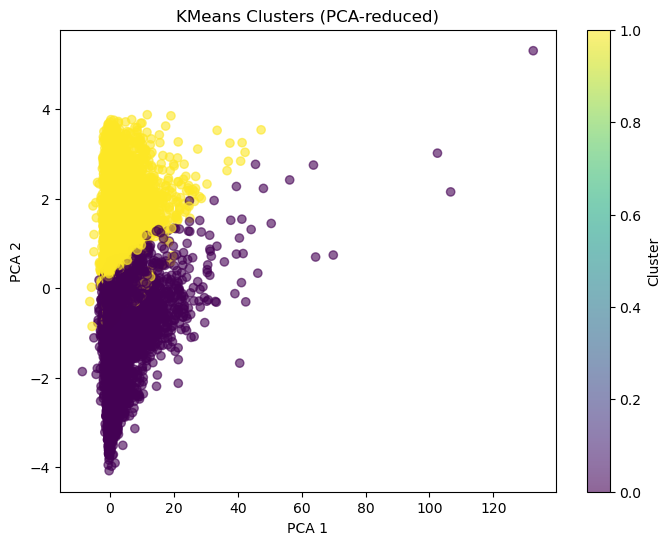

In [59]:
# Reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(df_features_scaled)

# Get cluster labels from your fitted KMeans
labels = kmeans.predict(df_features_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.title('KMeans Clusters (PCA-reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()

# supervised

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [61]:
X_train, X_test, y_train, y_test = train_test_split(df_features_scaled, df['Class'], test_size=0.2, random_state=14)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay

## k nearest neighbor

In [63]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [64]:
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.96      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



## decision tree

In [65]:
dt = DecisionTreeClassifier(random_state=14)
dt.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,14
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [66]:
y_pred_dt = dt.predict(X_test)
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.78      0.78      0.78        98

    accuracy                           1.00     56962
   macro avg       0.89      0.89      0.89     56962
weighted avg       1.00      1.00      1.00     56962



## random forest

In [67]:
rf = RandomForestClassifier(random_state=14)
rf.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [68]:
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.81      0.85        98

    accuracy                           1.00     56962
   macro avg       0.95      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



## support vector machine

In [69]:
svm = SVC(random_state=14)
svm.fit(X_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [70]:
y_pred_svm = svm.predict(X_test)
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.65      0.77        98

    accuracy                           1.00     56962
   macro avg       0.97      0.83      0.89     56962
weighted avg       1.00      1.00      1.00     56962



## logistic regression

In [71]:
lr = LogisticRegression(random_state=14)
lr.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,14
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [72]:
y_pred_lr = lr.predict(X_test)
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.61      0.72        98

    accuracy                           1.00     56962
   macro avg       0.94      0.81      0.86     56962
weighted avg       1.00      1.00      1.00     56962



## summary

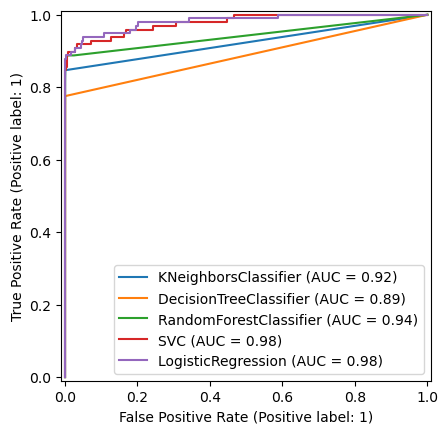

In [ ]:
fig,ax0 = plt.subplots()
RocCurveDisplay.from_estimator(knn, X_test, y_test, ax=ax0)
RocCurveDisplay.from_estimator(dt, X_test, y_test, ax=ax0)
RocCurveDisplay.from_estimator(rf, X_test, y_test, ax=ax0)
RocCurveDisplay.from_estimator(svm, X_test, y_test, ax=ax0)
RocCurveDisplay.from_estimator(lr, X_test, y_test, ax=ax0)
plt.show()

# undersampling majority (no fraud)

In [74]:
from sklearn.utils import resample

df_fraud = df[df['Class']==1]
df_nofraud = df[df['Class']==0]

df_nofraud_resampled = resample(df_nofraud, replace=False, n_samples=len(df_fraud), random_state=14)
print(f'{len(df_nofraud)} resampled down to {len(df_nofraud_resampled)}')

df_resampled = pd.concat([df_fraud, df_nofraud_resampled])

284315 resampled down to 492


In [75]:
df_features_resampled = df_resampled[features]

# scale features
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df_features_resampled)
df_features_resampled_scaled = pd.DataFrame(scaled_array, columns=features, index=df_features_resampled.index)

# visualize
df_features_resampled_scaled.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Time,Amount
count,984.000000,9.840000e+02,984.000000,9.840000e+02,9.840000e+02,984.000000,9.840000e+02,9.840000e+02,9.840000e+02,984.000000,...,984.000000,9.840000e+02,9.840000e+02,984.000000,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,984.000000
mean,0.000000,2.888385e-17,0.000000,1.733031e-16,2.888385e-17,0.000000,-2.888385e-17,7.220963e-18,-5.776770e-17,0.000000,...,0.000000,-1.353931e-17,-1.805241e-18,0.000000,1.444193e-17,2.166289e-17,1.444193e-17,-7.220963e-18,-1.155354e-16,0.000000
std,1.000509,1.000509e+00,1.000509,1.000509e+00,1.000509e+00,1.000509,1.000509e+00,1.000509e+00,1.000509e+00,1.000509,...,1.000509,1.000509e+00,1.000509e+00,1.000509,1.000509e+00,1.000509e+00,1.000509e+00,1.000509e+00,1.000509e+00,1.000509
min,-5.115809,-3.351580e+00,-4.445258,-1.753187e+00,-4.883609e+00,-3.188846,-6.961313e+00,-8.404524e+00,-5.279125e+00,-4.813054,...,-8.257534,-7.589747e+00,-1.513376e+01,-3.625090,-8.374751e+00,-2.625162e+00,-7.239670e+00,-7.810468e+00,-1.772251e+00,-0.394907
25%,-0.090779,-5.416545e-01,-0.255535,-7.349289e-01,-5.969465e-02,-0.514892,-5.361081e-02,-9.573706e-02,-4.321165e-01,-0.382486,...,-0.186274,-4.642464e-01,-1.484251e-01,-0.630136,-4.614191e-01,-6.528774e-01,-1.444570e-01,-2.110781e-01,-8.753891e-01,-0.390802
50%,0.282901,-2.328288e-01,0.358656,-2.962664e-01,2.755050e-01,0.012007,3.648838e-01,-2.097436e-02,2.594483e-01,0.438834,...,-0.069400,1.766311e-02,-9.921806e-04,0.087287,6.720746e-02,-9.938993e-02,-4.089467e-02,-2.740064e-03,-1.918838e-01,-0.322595
75%,0.621029,2.596607e-01,0.616381,5.950364e-01,4.891474e-01,0.438949,5.216478e-01,1.190889e-01,6.162486e-01,0.627943,...,0.105728,5.013869e-01,1.769469e-01,0.735774,5.273858e-01,6.353914e-01,3.476954e-01,4.270896e-01,1.015507e+00,-0.013153
max,0.846355,5.517539e+00,1.020033,3.099336e+00,3.003189e+00,4.020637,1.783218e+00,4.011272e+00,3.044983e+00,2.021442,...,9.582290,7.120343e+00,4.190209e+00,5.706109,3.151076e+00,5.858958e+00,3.980041e+00,4.066036e+00,1.739553e+00,15.300546


In [76]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(df_features_resampled_scaled, df_resampled['Class'], test_size=0.2, random_state=14)

In [77]:
# k nearest neighbors
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train_1,y_train_1)
y_pred_knn1 = knn1.predict(X_test_1)
print(classification_report(y_test_1,y_pred_knn1))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       102
           1       0.95      0.88      0.92        95

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197



In [78]:
# decision tree
dt1 = DecisionTreeClassifier(random_state=14)
dt1.fit(X_train_1,y_train_1)
y_pred_dt1 = dt1.predict(X_test_1)
print(classification_report(y_test_1,y_pred_dt1))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       102
           1       0.89      0.89      0.89        95

    accuracy                           0.89       197
   macro avg       0.89      0.89      0.89       197
weighted avg       0.89      0.89      0.89       197



In [79]:
# random forest
rf1 = RandomForestClassifier(random_state=14)
rf1.fit(X_train_1,y_train_1)
y_pred_rf1 = rf1.predict(X_test_1)
print(classification_report(y_test_1,y_pred_rf1))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       102
           1       0.95      0.91      0.92        95

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



In [80]:
# support vector machine
svm1 = SVC(random_state=14)
svm1.fit(X_train_1,y_train_1)
y_pred_svm1 = svm1.predict(X_test_1)
print(classification_report(y_test_1,y_pred_svm1))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       102
           1       0.97      0.88      0.92        95

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



In [81]:
# logistic regression
lr1 = LogisticRegression(random_state=14)
lr1.fit(X_train_1,y_train_1)
y_pred_lr1 = lr1.predict(X_test_1)
print(classification_report(y_test_1,y_pred_lr1))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       102
           1       0.95      0.91      0.92        95

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



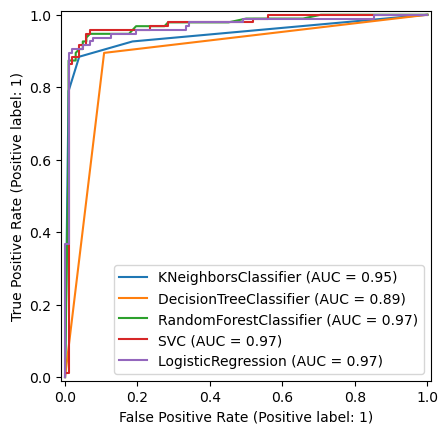

In [83]:
fig,ax0 = plt.subplots()
RocCurveDisplay.from_estimator(knn1, X_test_1, y_test_1, ax=ax0)
RocCurveDisplay.from_estimator(dt1, X_test_1, y_test_1, ax=ax0)
RocCurveDisplay.from_estimator(rf1, X_test_1, y_test_1, ax=ax0)
RocCurveDisplay.from_estimator(svm1, X_test_1, y_test_1, ax=ax0)
RocCurveDisplay.from_estimator(lr1, X_test_1, y_test_1, ax=ax0)
plt.show()